# Mouse Nissl example

This example maps betwen two Nissl stained mouse brain images.

Here we will use affine alignment in adition to deformable registration.  

Affine will be performed first, then both will be performed simultaneously

## Library imports
We start by importing necessary libraries.  That includes numpy, matplotlib, and tensorflow for numerical work, nibabel for loading neuroimages, and lddmm and vis which are part of this library.

In [1]:
#import os
#os.environ['CUDA_VISIBLE_DEVICES'] = ''
import numpy as np # for arrays
%matplotlib notebook
import matplotlib as mpl # for graphics
import matplotlib.pyplot as plt
import nibabel as nib # for loading neuroimages
import lddmm # algorithm
import vis # visualization
import tensorflow as tf
import imp # use imp.reload to update modules during development

importing vis


In [2]:
# Taken and adapted from https://github.com/CSBDeep/CSBDeep/blob/master/csbdeep/utils/tf.py and utils.py
import keras
from keras import backend as K
from keras.callbacks import Callback
from keras.layers import Lambda

def is_tf_backend():
    import keras.backend as K
    return K.backend() == 'tensorflow'


def limit_gpu_memory(fraction, allow_growth=False):
    """Limit GPU memory allocation for TensorFlow (TF) backend.
    Parameters
    ----------
    fraction : float
        Limit TF to use only a fraction (value between 0 and 1) of the available GPU memory.
        Reduced memory allocation can be disabled if fraction is set to ``None``.
    allow_growth : bool, optional
        If ``False`` (default), TF will allocate all designated (see `fraction`) memory all at once.
        If ``True``, TF will allocate memory as needed up to the limit imposed by `fraction`; this may
        incur a performance penalty due to memory fragmentation.
    Raises
    ------
    ValueError
        If `fraction` is not ``None`` or a float value between 0 and 1.
    NotImplementedError
        If TensorFlow is not used as the backend.
    """

    is_tf_backend() or _raise(NotImplementedError('Not using tensorflow backend.'))
    fraction is None or (np.isscalar(fraction) and 0<=fraction<=1) or _raise(ValueError('fraction must be between 0 and 1.'))

    if K.tensorflow_backend._SESSION is None:
        config = tf.ConfigProto()
        if fraction is not None:
            config.gpu_options.per_process_gpu_memory_fraction = fraction
        config.gpu_options.allow_growth = bool(allow_growth)
        session = tf.Session(config=config)
        K.tensorflow_backend.set_session(session)
        # print("[tf_limit]\t setting config.gpu_options.per_process_gpu_memory_fraction to ",config.gpu_options.per_process_gpu_memory_fraction)
    else:
        warnings.warn('Too late too limit GPU memory, can only be done once and before any computation.')


Using TensorFlow backend.


In [3]:
limit_gpu_memory(fraction = 0.5, allow_growth=True)

In [4]:
# get filenames
atlas_image_fname = 'PMD2052_orig_target_STS_clean.img'
target_image_fname = 'PMD3097_orig_target_STS_clean.img'

In [5]:
# load them with nibabel
fnames = [atlas_image_fname,target_image_fname]
img = [nib.load(fname) for fname in fnames]

In [6]:
# get info about image space
if '.img' == atlas_image_fname[-4:]:    
    nxI = img[0].header['dim'][1:4]
    dxI = img[0].header['pixdim'][1:4]
    nxJ = img[1].header['dim'][1:4]
    dxJ = img[1].header['pixdim'][1:4]
else:
    # I'm only working with analyze for now
    raise ValueError('Only Analyze images supported for now')
xI = [np.arange(nxi)*dxi - np.mean(np.arange(nxi)*dxi) for nxi,dxi in zip(nxI,dxI)]
xJ = [np.arange(nxi)*dxi - np.mean(np.arange(nxi)*dxi) for nxi,dxi in zip(nxJ,dxJ)]

In [7]:
# get the images, note they also include a fourth axis for time that I don't want
I = img[0].get_data()[:,:,:,0]
J = img[1].get_data()[:,:,:,0]

<IPython.core.display.Javascript object>


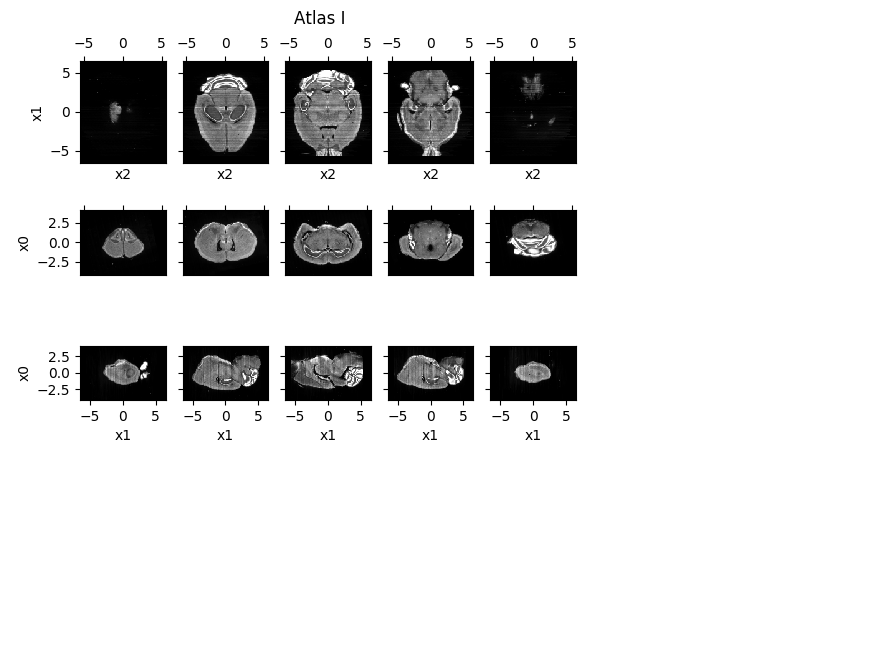

In [8]:
# display the data
f = plt.figure()
vis.imshow_slices(I, x=xI, fig=f)
f.suptitle('Atlas I')
f.canvas.draw()

<IPython.core.display.Javascript object>


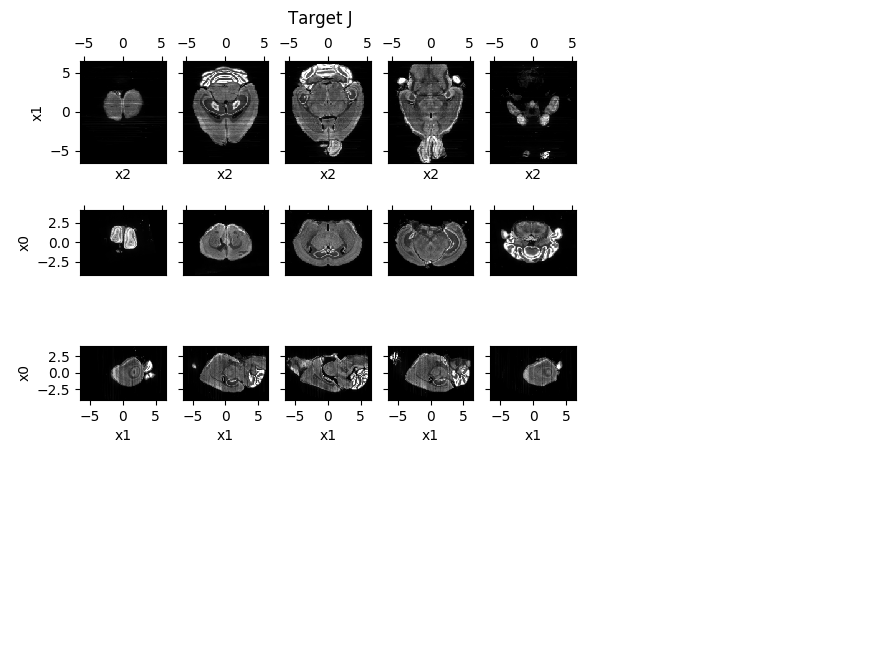

In [9]:
f = plt.figure()
vis.imshow_slices(J,x=xJ,fig=f)
f.suptitle('Target J')
f.canvas.draw()

## Run DR IT image matching

Set default parameters
Initial affine transform [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
Got parameters


<IPython.core.display.Javascript object>


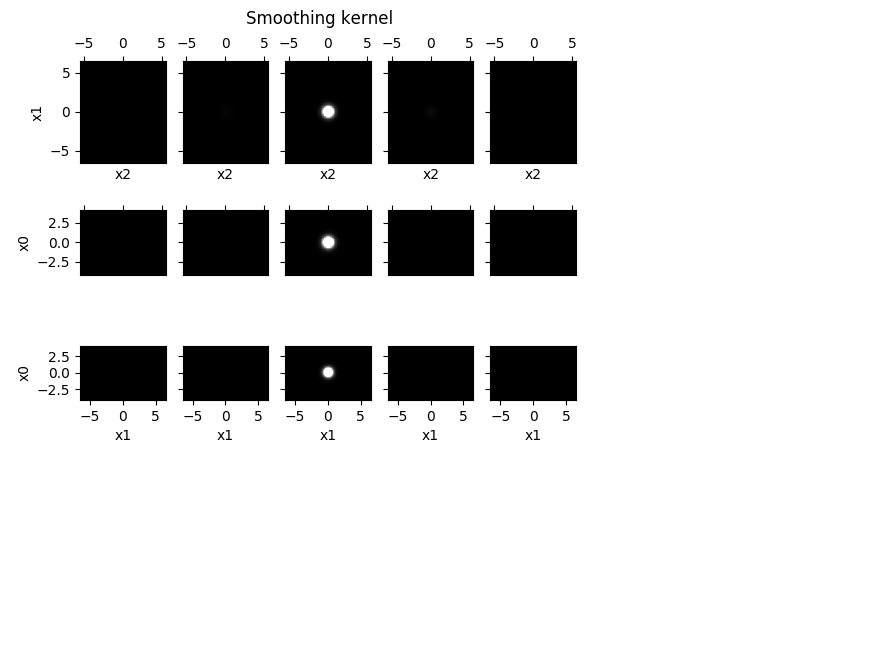

Built energy operators
Instructions for updating:
Colocations handled automatically by placer.
Built tensorflow variables
Computation graph defined


<IPython.core.display.Javascript object>


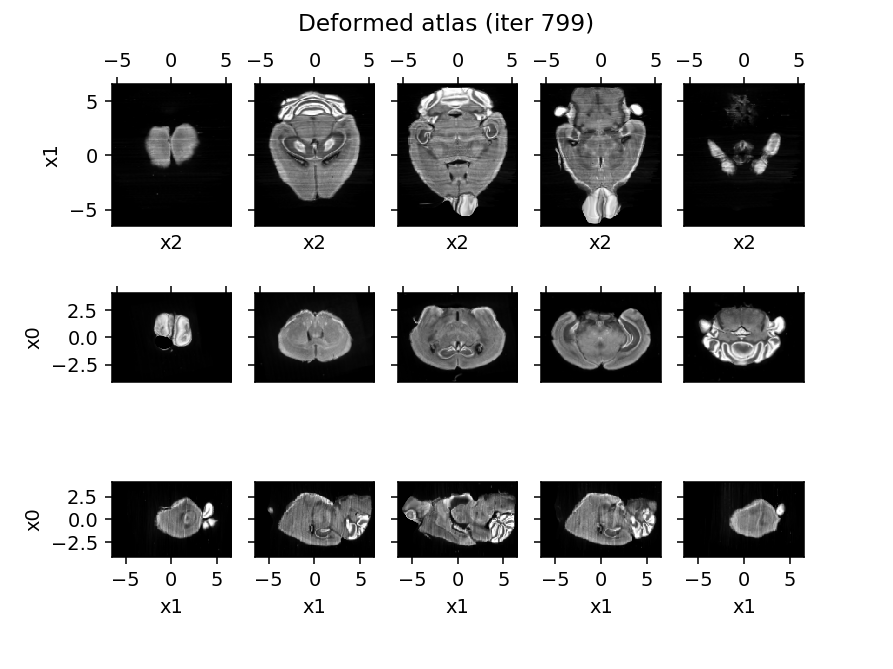

<IPython.core.display.Javascript object>


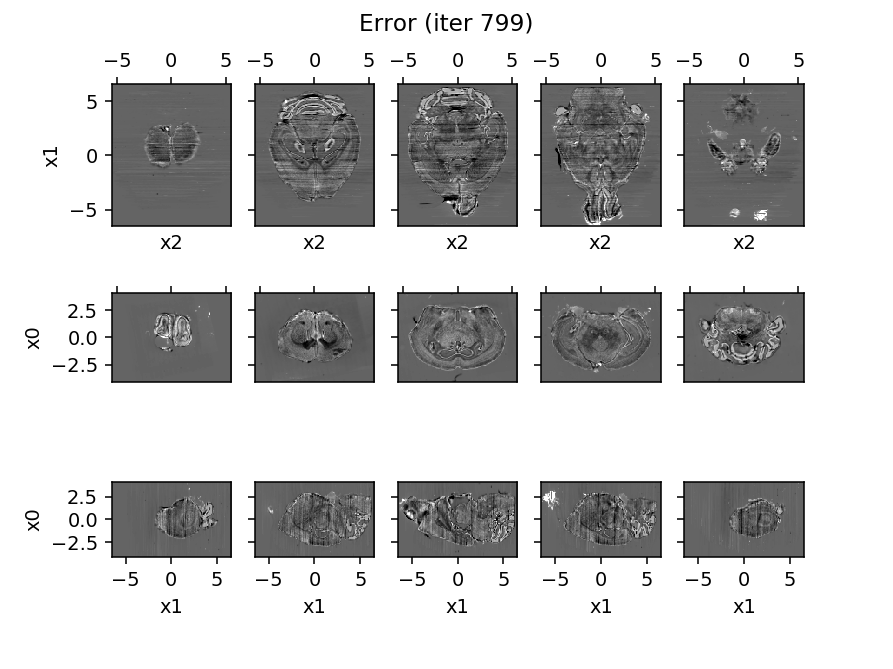

<IPython.core.display.Javascript object>


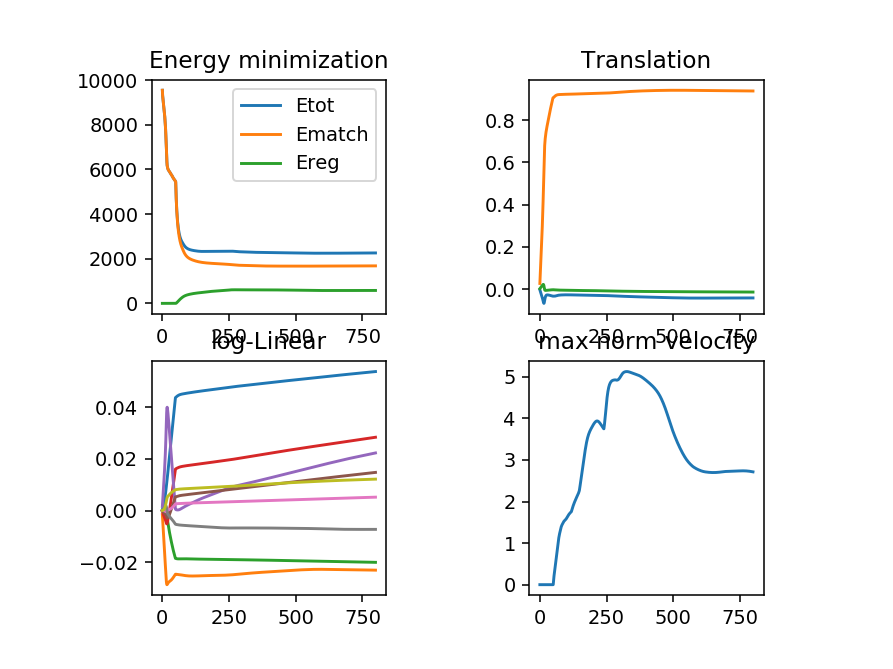

Taking affine only step


/home/vzickus/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Finished iteration 0, energy 9.542475e+03 (match 9.542475e+03, reg 0.000000e+00)
Taking affine only step
Finished iteration 1, energy 9.302499e+03 (match 9.302499e+03, reg 0.000000e+00)
Taking affine only step
Finished iteration 2, energy 9.186728e+03 (match 9.186728e+03, reg 0.000000e+00)
Taking affine only step
Finished iteration 3, energy 9.064194e+03 (match 9.064194e+03, reg 0.000000e+00)
Taking affine only step
Finished iteration 4, energy 8.920076e+03 (match 8.920076e+03, reg 0.000000e+00)
Taking affine only step
Finished iteration 5, energy 8.806865e+03 (match 8.806865e+03, reg 0.000000e+00)
Taking affine only step
Finished iteration 6, energy 8.689078e+03 (match 8.689078e+03, reg 0.000000e+00)
Taking affine only step
Finished iteration 7, energy 8.602207e+03 (match 8.602207e+03, reg 0.000000e+00)
Taking affine only step
Finished iteration 8, energy 8.470035e+03 (match 8.470035e+03, reg 0.000000e+00)
Taking affine only step
Finished iteration 9, energy 8.354912e+03 (match 8.3549

Finished iteration 75, energy 2.726654e+03 (match 2.455371e+03, reg 2.712831e+02)
Taking affine and deformation step
Finished iteration 76, energy 2.704916e+03 (match 2.424895e+03, reg 2.800212e+02)
Taking affine and deformation step
Finished iteration 77, energy 2.684270e+03 (match 2.395845e+03, reg 2.884242e+02)
Taking affine and deformation step
Finished iteration 78, energy 2.664289e+03 (match 2.367813e+03, reg 2.964754e+02)
Taking affine and deformation step
Finished iteration 79, energy 2.644246e+03 (match 2.340078e+03, reg 3.041677e+02)
Taking affine and deformation step
Finished iteration 80, energy 2.625532e+03 (match 2.314050e+03, reg 3.114817e+02)
Taking affine and deformation step
Finished iteration 81, energy 2.606846e+03 (match 2.288441e+03, reg 3.184052e+02)
Taking affine and deformation step
Finished iteration 82, energy 2.589591e+03 (match 2.264655e+03, reg 3.249367e+02)
Taking affine and deformation step
Finished iteration 83, energy 2.573714e+03 (match 2.242620e+03, 

Finished iteration 145, energy 2.326735e+03 (match 1.841250e+03, reg 4.854849e+02)
Taking affine and deformation step
Finished iteration 146, energy 2.326356e+03 (match 1.839246e+03, reg 4.871095e+02)
Taking affine and deformation step
Finished iteration 147, energy 2.326065e+03 (match 1.837305e+03, reg 4.887604e+02)
Taking affine and deformation step
Finished iteration 148, energy 2.325867e+03 (match 1.835430e+03, reg 4.904362e+02)
Taking affine and deformation step
Finished iteration 149, energy 2.325750e+03 (match 1.833619e+03, reg 4.921319e+02)
Taking affine and deformation step
Finished iteration 150, energy 2.325712e+03 (match 1.831874e+03, reg 4.938385e+02)
Taking affine and deformation step
Finished iteration 151, energy 2.325734e+03 (match 1.830187e+03, reg 4.955464e+02)
Taking affine and deformation step
Finished iteration 152, energy 2.325794e+03 (match 1.828550e+03, reg 4.972437e+02)
Taking affine and deformation step
Finished iteration 153, energy 2.325878e+03 (match 1.826

Finished iteration 215, energy 2.329459e+03 (match 1.768004e+03, reg 5.614547e+02)
Taking affine and deformation step
Finished iteration 216, energy 2.329436e+03 (match 1.767361e+03, reg 5.620753e+02)
Taking affine and deformation step
Finished iteration 217, energy 2.329435e+03 (match 1.766744e+03, reg 5.626910e+02)
Taking affine and deformation step
Finished iteration 218, energy 2.329458e+03 (match 1.766155e+03, reg 5.633035e+02)
Taking affine and deformation step
Finished iteration 219, energy 2.329503e+03 (match 1.765588e+03, reg 5.639155e+02)
Taking affine and deformation step
Finished iteration 220, energy 2.329562e+03 (match 1.765033e+03, reg 5.645287e+02)
Taking affine and deformation step
Finished iteration 221, energy 2.329627e+03 (match 1.764481e+03, reg 5.651459e+02)
Taking affine and deformation step
Finished iteration 222, energy 2.329705e+03 (match 1.763937e+03, reg 5.657683e+02)
Taking affine and deformation step
Finished iteration 223, energy 2.329803e+03 (match 1.763

Finished iteration 285, energy 2.313897e+03 (match 1.707483e+03, reg 6.064140e+02)
Taking affine and deformation step
Finished iteration 286, energy 2.313176e+03 (match 1.706957e+03, reg 6.062188e+02)
Taking affine and deformation step
Finished iteration 287, energy 2.312521e+03 (match 1.706520e+03, reg 6.060016e+02)
Taking affine and deformation step
Finished iteration 288, energy 2.311908e+03 (match 1.706119e+03, reg 6.057892e+02)
Taking affine and deformation step
Finished iteration 289, energy 2.311340e+03 (match 1.705737e+03, reg 6.056035e+02)
Taking affine and deformation step
Finished iteration 290, energy 2.310823e+03 (match 1.705379e+03, reg 6.054437e+02)
Taking affine and deformation step
Finished iteration 291, energy 2.310323e+03 (match 1.705020e+03, reg 6.053036e+02)
Taking affine and deformation step
Finished iteration 292, energy 2.309832e+03 (match 1.704645e+03, reg 6.051866e+02)
Taking affine and deformation step
Finished iteration 293, energy 2.309378e+03 (match 1.704

Finished iteration 355, energy 2.284055e+03 (match 1.679389e+03, reg 6.046664e+02)
Taking affine and deformation step
Finished iteration 356, energy 2.283818e+03 (match 1.679183e+03, reg 6.046348e+02)
Taking affine and deformation step
Finished iteration 357, energy 2.283580e+03 (match 1.678976e+03, reg 6.046032e+02)
Taking affine and deformation step
Finished iteration 358, energy 2.283351e+03 (match 1.678780e+03, reg 6.045712e+02)
Taking affine and deformation step
Finished iteration 359, energy 2.283126e+03 (match 1.678587e+03, reg 6.045390e+02)
Taking affine and deformation step
Finished iteration 360, energy 2.282905e+03 (match 1.678397e+03, reg 6.045079e+02)
Taking affine and deformation step
Finished iteration 361, energy 2.282686e+03 (match 1.678208e+03, reg 6.044788e+02)
Taking affine and deformation step
Finished iteration 362, energy 2.282470e+03 (match 1.678018e+03, reg 6.044518e+02)
Taking affine and deformation step
Finished iteration 363, energy 2.282257e+03 (match 1.677

Finished iteration 425, energy 2.270350e+03 (match 1.669157e+03, reg 6.011932e+02)
Taking affine and deformation step
Finished iteration 426, energy 2.270262e+03 (match 1.669117e+03, reg 6.011450e+02)
Taking affine and deformation step
Finished iteration 427, energy 2.270170e+03 (match 1.669073e+03, reg 6.010968e+02)
Taking affine and deformation step
Finished iteration 428, energy 2.270073e+03 (match 1.669025e+03, reg 6.010480e+02)
Taking affine and deformation step
Finished iteration 429, energy 2.269978e+03 (match 1.668979e+03, reg 6.009985e+02)
Taking affine and deformation step
Finished iteration 430, energy 2.269884e+03 (match 1.668936e+03, reg 6.009482e+02)
Taking affine and deformation step
Finished iteration 431, energy 2.269787e+03 (match 1.668890e+03, reg 6.008969e+02)
Taking affine and deformation step
Finished iteration 432, energy 2.269687e+03 (match 1.668842e+03, reg 6.008444e+02)
Taking affine and deformation step
Finished iteration 433, energy 2.269589e+03 (match 1.668

Finished iteration 495, energy 2.257892e+03 (match 1.666132e+03, reg 5.917596e+02)
Taking affine and deformation step
Finished iteration 496, energy 2.257683e+03 (match 1.666118e+03, reg 5.915647e+02)
Taking affine and deformation step
Finished iteration 497, energy 2.257476e+03 (match 1.666106e+03, reg 5.913697e+02)
Taking affine and deformation step
Finished iteration 498, energy 2.257270e+03 (match 1.666096e+03, reg 5.911741e+02)
Taking affine and deformation step
Finished iteration 499, energy 2.257067e+03 (match 1.666089e+03, reg 5.909780e+02)
Taking affine and deformation step
Finished iteration 500, energy 2.256868e+03 (match 1.666086e+03, reg 5.907819e+02)
Taking affine and deformation step
Finished iteration 501, energy 2.256672e+03 (match 1.666086e+03, reg 5.905865e+02)
Taking affine and deformation step
Finished iteration 502, energy 2.256482e+03 (match 1.666091e+03, reg 5.903919e+02)
Taking affine and deformation step
Finished iteration 503, energy 2.256294e+03 (match 1.666

Finished iteration 565, energy 2.246269e+03 (match 1.668154e+03, reg 5.781148e+02)
Taking affine and deformation step
Finished iteration 566, energy 2.246221e+03 (match 1.668182e+03, reg 5.780395e+02)
Taking affine and deformation step
Finished iteration 567, energy 2.246176e+03 (match 1.668210e+03, reg 5.779659e+02)
Taking affine and deformation step
Finished iteration 568, energy 2.246132e+03 (match 1.668238e+03, reg 5.778938e+02)
Taking affine and deformation step
Finished iteration 569, energy 2.246089e+03 (match 1.668266e+03, reg 5.778233e+02)
Taking affine and deformation step
Finished iteration 570, energy 2.246049e+03 (match 1.668295e+03, reg 5.777545e+02)
Taking affine and deformation step
Finished iteration 571, energy 2.246010e+03 (match 1.668322e+03, reg 5.776878e+02)
Taking affine and deformation step
Finished iteration 572, energy 2.245972e+03 (match 1.668349e+03, reg 5.776229e+02)
Taking affine and deformation step
Finished iteration 573, energy 2.245936e+03 (match 1.668

Finished iteration 635, energy 2.246177e+03 (match 1.670936e+03, reg 5.752414e+02)
Taking affine and deformation step
Finished iteration 636, energy 2.246217e+03 (match 1.670964e+03, reg 5.752521e+02)
Taking affine and deformation step
Finished iteration 637, energy 2.246257e+03 (match 1.670992e+03, reg 5.752646e+02)
Taking affine and deformation step
Finished iteration 638, energy 2.246300e+03 (match 1.671022e+03, reg 5.752778e+02)
Taking affine and deformation step
Finished iteration 639, energy 2.246343e+03 (match 1.671052e+03, reg 5.752913e+02)
Taking affine and deformation step
Finished iteration 640, energy 2.246387e+03 (match 1.671082e+03, reg 5.753052e+02)
Taking affine and deformation step
Finished iteration 641, energy 2.246433e+03 (match 1.671113e+03, reg 5.753193e+02)
Taking affine and deformation step
Finished iteration 642, energy 2.246477e+03 (match 1.671144e+03, reg 5.753338e+02)
Taking affine and deformation step
Finished iteration 643, energy 2.246520e+03 (match 1.671

Finished iteration 705, energy 2.250686e+03 (match 1.673938e+03, reg 5.767485e+02)
Taking affine and deformation step
Finished iteration 706, energy 2.250738e+03 (match 1.673962e+03, reg 5.767757e+02)
Taking affine and deformation step
Finished iteration 707, energy 2.250790e+03 (match 1.673989e+03, reg 5.768012e+02)
Taking affine and deformation step
Finished iteration 708, energy 2.250840e+03 (match 1.674015e+03, reg 5.768248e+02)
Taking affine and deformation step
Finished iteration 709, energy 2.250891e+03 (match 1.674043e+03, reg 5.768475e+02)
Taking affine and deformation step
Finished iteration 710, energy 2.250942e+03 (match 1.674073e+03, reg 5.768688e+02)
Taking affine and deformation step
Finished iteration 711, energy 2.250992e+03 (match 1.674103e+03, reg 5.768890e+02)
Taking affine and deformation step
Finished iteration 712, energy 2.251042e+03 (match 1.674134e+03, reg 5.769081e+02)
Taking affine and deformation step
Finished iteration 713, energy 2.251092e+03 (match 1.674

Finished iteration 775, energy 2.256570e+03 (match 1.678661e+03, reg 5.779089e+02)
Taking affine and deformation step
Finished iteration 776, energy 2.256631e+03 (match 1.678689e+03, reg 5.779422e+02)
Taking affine and deformation step
Finished iteration 777, energy 2.256691e+03 (match 1.678716e+03, reg 5.779757e+02)
Taking affine and deformation step
Finished iteration 778, energy 2.256749e+03 (match 1.678740e+03, reg 5.780092e+02)
Taking affine and deformation step
Finished iteration 779, energy 2.256807e+03 (match 1.678764e+03, reg 5.780425e+02)
Taking affine and deformation step
Finished iteration 780, energy 2.256862e+03 (match 1.678786e+03, reg 5.780759e+02)
Taking affine and deformation step
Finished iteration 781, energy 2.256917e+03 (match 1.678808e+03, reg 5.781093e+02)
Taking affine and deformation step
Finished iteration 782, energy 2.256971e+03 (match 1.678828e+03, reg 5.781427e+02)
Taking affine and deformation step
Finished iteration 783, energy 2.257023e+03 (match 1.678

In [10]:
#imp.reload(lddmm) # for debugging only

p = 2
sigmaM = 10.0

eL = 5e-7
eT = 2e-5
eV = 5e-4

naffine = 50
niter = 800
sigmaR = 2e-1
a = (xI[0][1]-xI[0][0])*2 # 2 pixels smoothness scale



out = lddmm.lddmm(I,J, # atlas and target images
                  xI=xI,
                  xJ=xJ,
                  niter=niter, # number of iterations of gradient descent  
                  naffine=naffine, # number of iteratoins of affine only optimization
                  eV=eV, # step size for deformation field update
                  eL=eL,
                  eT=eT,
                  sigmaM=sigmaM, # noise in image (matching weight 1/2/sigmaM**2)
                  sigmaR=sigmaR, # noise in deformation (regularization weight 1/2/sigmaR**2)
                  p=p, # power of smoothing operator, 2 is typical
                  a=a # length scale of smoothing operator (mm)
                 )
# if I don't input a voxel spacing, it will default to 1

In [11]:
out.keys()


dict_keys(['A', 'vt0', 'vt1', 'vt2', 'phiinv0', 'phiinv1', 'phiinv2', 'phi0', 'phi1', 'phi2', 'phiinvAinv0', 'phiinvAinv1', 'phiinvAinv2', 'Aphi0', 'Aphi1', 'Aphi2', 'WM', 'WA', 'AphiI', 'f_kernel', 'f_deformed', 'f_error', 'f_energy'])

In [12]:
from tifffile import imsave

In [13]:
test_stack = out["AphiI"]

In [14]:
imsave( "test_niter_" + str(niter) + ".tiff", test_stack)